In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_set = pd.read_csv('ipf_data.csv')
new_dob_sex = pd.read_csv('ild_dob.csv')

In [207]:
data_set = data_set.iloc[:,0:72]
data_set = data_set.drop(columns='Age')
data_set = data_set.drop(columns='sex')
data2 = pd.merge(data_set, new_dob_sex, on='bru_id')
len(data2)

675

In [208]:
# Selecting only fibrosis patients (talk with Phil)
data2 = data2[data2.fibrosis=='Y']
len(data2)

591

In [0]:
# Make a few new variables (from talk with Phil)
data2['vol_diff'] = data2.volin - data2.volou
#print(data_set.vol_diff)

## Building new variables after the talk with Phil
data2['sum_btd'] = data2.macs+data2.lymph1+data2.eos+data2.neut1+data2.mast 
#sum blood test data
data2['prop_macs'] = data2.macs/data2.sum_btd
data2['prop_lymph1'] = data2.lymph1/data2.sum_btd
data2['prop_eos'] = data2.eos/data2.sum_btd
data2['prop_neut1'] = data2.neut1/data2.sum_btd
data2['prop_mast'] = data2.mast/data2.sum_btd


In [0]:
data2 = data2.drop(columns=['volin', 'volou', 'macs','lymph1', 'eos', 'neut1', 'mast', 'death_flag'], axis=1)

In [211]:
data2.isnull().sum()/len(data2)

bru_id                   0.000000
diagnosis                0.000000
fibrosis                 0.000000
level_1_grouping         0.000000
level_2_grouping         0.008460
death_date               0.824027
smoking_history          0.011844
pyh                      0.018613
familial_ild             0.715736
reflux                   0.710660
steroids                 0.316413
steroid_dose             0.000000
mcv                      0.006768
plt                      0.006768
wbc                      0.006768
neut                     0.006768
lymph                    0.006768
eosinoph                 0.006768
monoc                    0.006768
sodium                   0.006768
potassium                0.006768
urea                     0.006768
creatinine               0.006768
crp                      0.006768
bnp                      0.103215
immunoglobulin_a         0.006768
immunoglobulin_g         0.006768
immunoglobulin_m         0.006768
ck                       0.345178
ccp_result    

In [212]:
# DRopping variables with null values>15%
#num_null = data2.isnull().sum()
#num_null.index(num_null/len(data2)<0.15)

#data2.drop(data2.columns[(num_null/len(data2))<0.15])
data2 = data2[data2.columns[data2.isnull().sum()/len(data2) <0.15]]
data2.keys()


Index(['bru_id', 'diagnosis', 'fibrosis', 'level_1_grouping',
       'level_2_grouping', 'smoking_history', 'pyh', 'steroid_dose', 'mcv',
       'plt', 'wbc', 'neut', 'lymph', 'eosinoph', 'monoc', 'sodium',
       'potassium', 'urea', 'creatinine', 'crp', 'bnp', 'immunoglobulin_a',
       'immunoglobulin_g', 'immunoglobulin_m', 'ccp', 'avian_igg', 'ctd',
       'ctd_screen', 'ena_screen', 'dsdna_ab', 'Survival Days', 'BMI',
       'patient_height', 'patient_weight', 'fev_1', 'fev_1__pred', 'fvc',
       'fvc__pred', 'fev_1__vc_max', 'dlcoc_single_breath',
       'dlcoc_single_breath_', 'kco', 'kcoc', 'sex', 'age', 'vol_diff',
       'sum_btd', 'prop_macs', 'prop_lymph1', 'prop_eos', 'prop_neut1',
       'prop_mast'],
      dtype='object')

In [213]:
len(data2.columns)

52

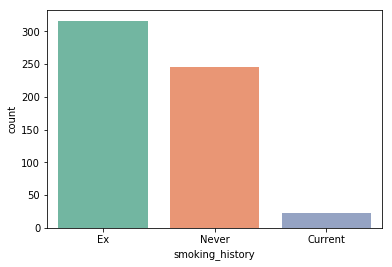

<Figure size 432x288 with 0 Axes>

In [214]:
sns.countplot(x='smoking_history', data=data2, palette='Set2')
plt.show()
plt.savefig('smoking_history.png')
from google.colab import files
files.download('smoking_history.png' )

In [0]:
files.download('smoking_history.png' )

In [216]:
# checking no nan in survival data
np.unique(data2['ena_screen'], return_counts=True)

(array([-1. ,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,
         1.1,  1.2,  1.4,  1.6,  2.1,  3.2,  3.3,  3.7,  5.7,  5.8,  6.7,
         6.8,  7.4,  7.5,  9. , 10. , 13. , 16. , 20. , 21. , 22. , 24. ,
        26. , 28. , 39. , 92. ,  nan,  nan,  nan,  nan]),
 array([463,   2,  11,  30,  24,  10,   7,   3,   2,   1,   3,   2,   2,
          1,   1,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1]))

In [0]:
# Cleaning missing  data
#sum(data2.patient_weight<25)
#len(data2.index)
#data2 = data2.drop(data2[data2.patient_weight<25].index)
# DRopping values of vol_diff too low - means lung analysis may not be 
# accurate
data2 = data2.drop(data2[data2.vol_diff<50].index)

In [0]:
dummyCols = pd.get_dummies(data2.smoking_history)
data2 = data2.join(dummyCols)
data2 = data2.drop(columns='smoking_history')


In [0]:
np.unique(data2.dsdna_ab, return_counts=True)   # -1 = missing values
data2 = data2.drop(columns='dsdna_ab', axis=1)

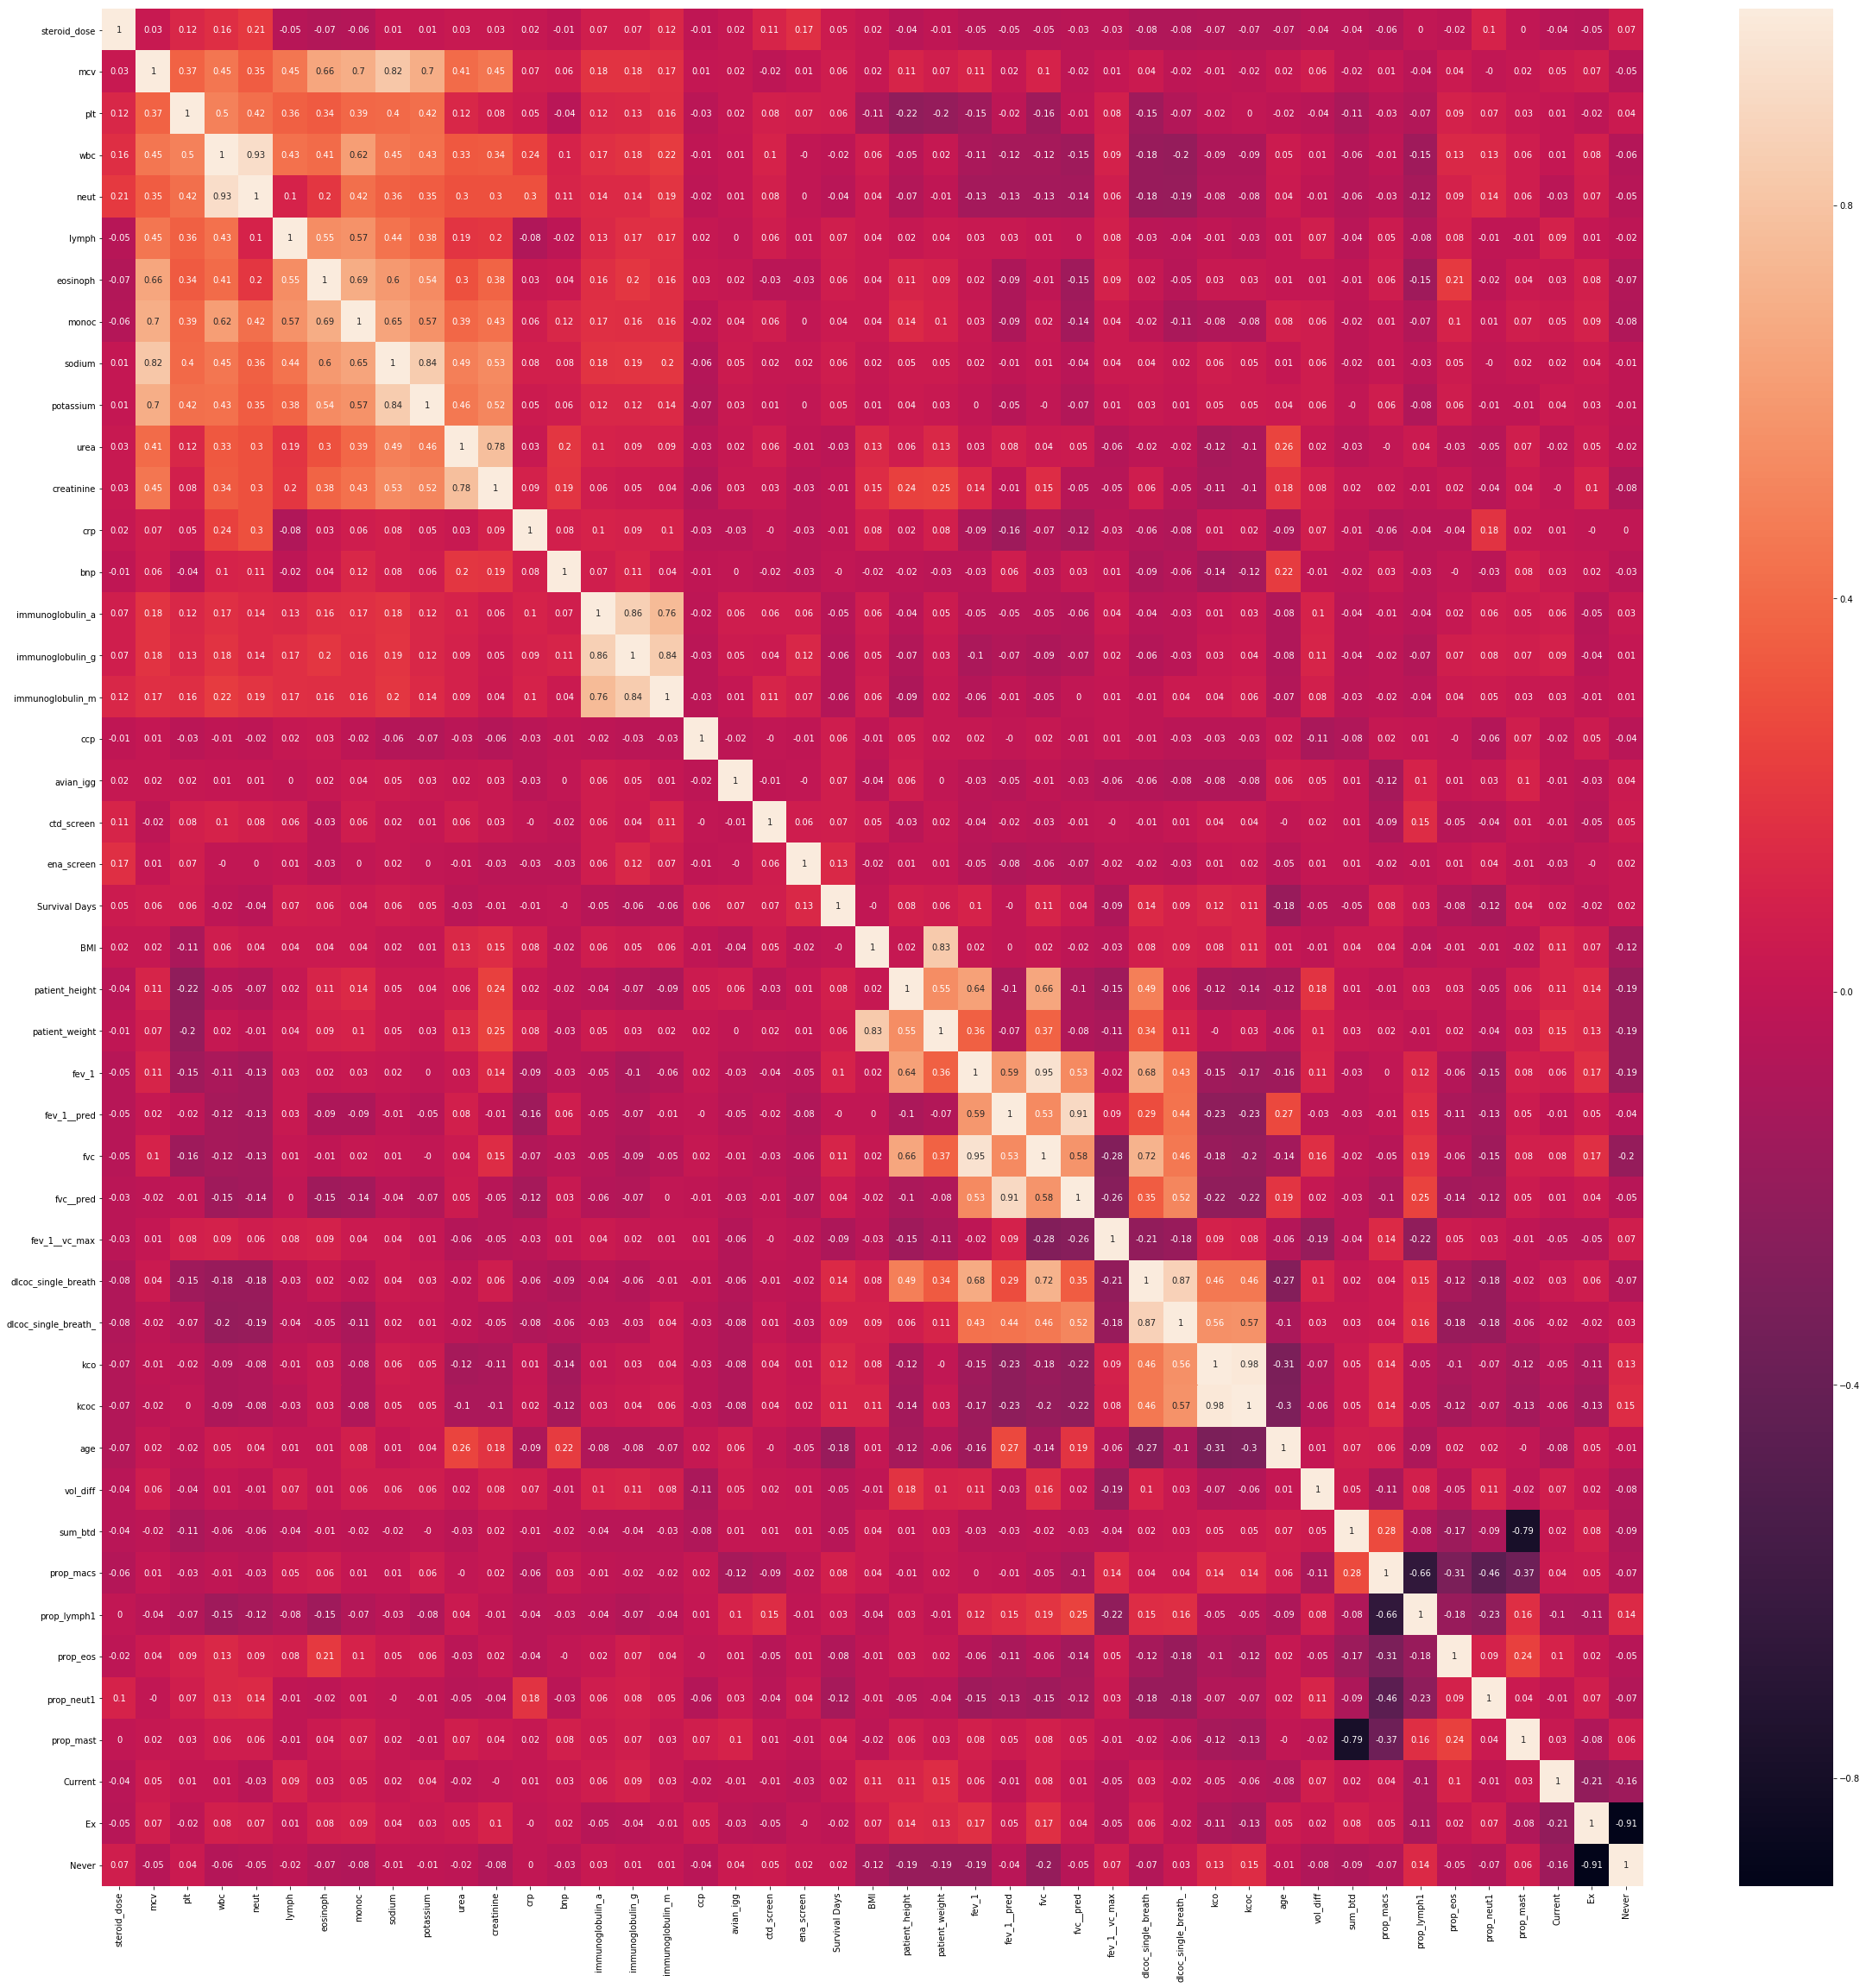

In [220]:
correlation_matrix = data2.corr().round(2)
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)
plt.savefig('corr_heatmap.png', transparent=True)
from google.colab import files
files.download( "corr_heatmap.png" )

In [221]:
plt.savefig('corr_heatmap.png')
from google.colab import files
files.download( "corr_heatmap.png" ) 

<Figure size 432x288 with 0 Axes>

In [0]:
#correlation_matrix['Survival Days']

In [0]:
n=correlation_matrix['Survival Days']
n2 = n[n>0.07]#n2 = n[n]


In [224]:
n3 = correlation_matrix['Survival Days'][abs(correlation_matrix['Survival Days'])>0.08]
#n3 = n3[n3<1]
vars_wanted = n3.keys()
vars_wanted

Index(['ena_screen', 'Survival Days', 'fev_1', 'fvc', 'fev_1__vc_max',
       'dlcoc_single_breath', 'dlcoc_single_breath_', 'kco', 'kcoc', 'age',
       'prop_neut1'],
      dtype='object')

In [0]:
vars_wanted = [ 'Survival Days', 'fvc', 'fev_1__vc_max',
       'dlcoc_single_breath', 'kco', 'kcoc', 'age',
       'prop_neut1']

In [0]:
X = pd.DataFrame(data2[vars_wanted])
X = X.dropna() 
#X = X.drop(columns='ena_screen') #full of -1's


In [227]:
# Beginning the ML dropped data2['smoking_history'], Try2
 

Y = X['Survival Days']
X = X.drop(columns='Survival Days')

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse)) #lower is better
print('R2 score is {}'.format(r2)) #higher is better, 38% is noise



The model performance for testing set
--------------------------------------
RMSE is 438.9201127643062
R2 score is 0.08316179034021076


In [228]:
len(X)

519

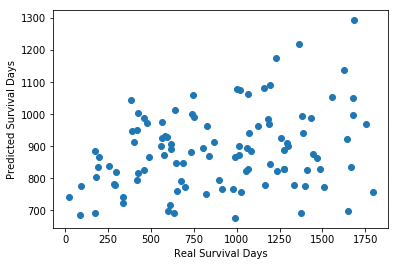

In [238]:
vars_wanted = [ 'Survival Days', 'fvc', 'fev_1__vc_max',
       'dlcoc_single_breath', 'kco', 'kcoc', 'age',
       'prop_neut1']

#visualize results
plt.scatter(Y_test, y_test_predict)
plt.xlabel('Real Survival Days')
plt.ylabel('Predicted Survival Days')
#pyplot.plot(x_values,prediction)

plt.savefig('ML_result.png', transparency=True)
from google.colab import files
files.download( 'ML_result.png' )
plt.show()

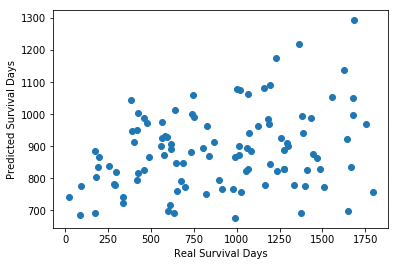

In [230]:
#Try2
vars_wanted = [ 'Survival Days', 'fvc', 'fev_1__vc_max',
       'dlcoc_single_breath', 'kco', 'kcoc', 'age',
       'prop_neut1']

#visualize results
plt.scatter(Y_test, y_test_predict)
plt.xlabel('Real Survival Days')
plt.ylabel('Predicted Survival Days')
#pyplot.plot(x_values,prediction)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


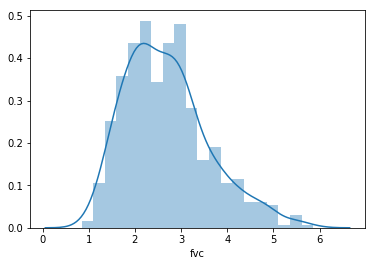

In [231]:
# Visualisation
sns.distplot(data2.fvc, bins=20)


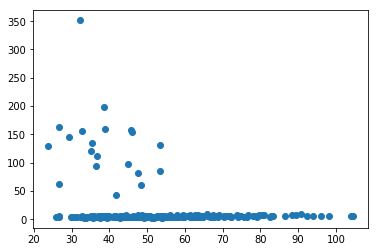

In [232]:
# Checkinf for correlations to help select data
import matplotlib.pyplot as plt
plt.scatter(data_set.dlcoc_single_breath_, data_set.tlc_plethysmograph)
plt.show()

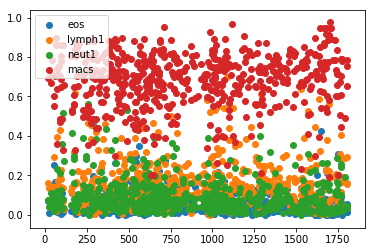

In [233]:
survival_day = data2['Survival Days']
import matplotlib.pyplot as plt

#plt.scatter(survival_day, data2.age, label='mast')
plt.scatter(survival_day, data2.prop_eos, label='eos')
plt.scatter(survival_day, data2.prop_lymph1, label='lymph1')
plt.scatter(survival_day, data2.prop_neut1, label='neut1')
plt.scatter(survival_day, data2.prop_macs, label='macs')
plt.legend(loc='upper left');

plt.show()

In [0]:
#data2.pyh=='nan'.index()
#data2.index[data2['pyh'] == 'nan'].tolist()
sns.countplot(x='smoking_history', data=data2, palette='Set2')
plt.show()

In [0]:
survival_day = data2['Survival Days']

plt.scatter(survival_day, data2.immunoglobulin_a, label='imm a')
plt.scatter(survival_day, data2.immunoglobulin_g, label='imm g')
plt.scatter(survival_day, data2.immunoglobulin_m, label='imm m')
plt.legend(loc='upper left');

plt.show()

In [0]:
# Visualisation
sns.distplot(data2.patient_height, bins=20)

In [0]:
survival_day = data2['Survival Days']

plt.scatter(survival_day, data2.prop_eos, label='p eos')
plt.scatter(survival_day, data2.fev_1__vc_max, label='prop neut')
#plt.scatter(survival_day, data2.ena_screen, label='ena')
plt.legend(loc='upper right');

plt.show()

In [0]:
# select data for correlation matrix try2 with new variables
correlation_input = data2.loc[:,['Survival Days','age', 'sex',
       'smoking_history', 'familial_ild', 'reflux', 'steroids',
        'vol_diff', 'mcv', 'plt', 'wbc', 'neut', 'lymph',
       'eosinoph', 'monoc', 'sodium', 'potassium', 'urea', 'creatinine', 'crp',
       'bnp', 'immunoglobulin_a', 'immunoglobulin_g', 'immunoglobulin_m', 'ck',
       'ccp_result', 'ccp', 'avian_ppt', 'avian_igg', 'ctd', 'ctd_screen',
       'ena_screen', 'rnpsm', 'ro', 'la', 'jo1', 'scl70',
       '52kd_ro', 'prop_macs', 'prop_lymph1', 'prop_eos', 'prop_neut1', 'prop_mast', 
        'FVC', 'DCLO', 'Lung Function Decline', 'Composite End Point',
       'patient_height', 'patient_weight', 'fev_1', 'fev_1__pred', 'fvc',
       'fvc__pred', 'fev_1__vc_max', 'dlcoc_single_breath',
       'dlcoc_single_breath_', 'kco', 'kcoc', 'rv_plethysmograph']]# load all variables 
#print(correlation_input)



correlation_matrix = correlation_input.corr().round(2)
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

In [0]:
# Plotting the Blood Test results
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'INDUS', 'PTRATIO']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
plt.ylabel('MEDV')


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

In [0]:
#len(data2.smoking_history)
data2.smoking_history.unique()
#sum(data2.smoking_history =='nan')

In [0]:
# Beginning the ML dropped data2['smoking_history'], Try1
#X = pd.DataFrame(np.c_[data2['Survival Days'],data2['age'], data2['prop_lymph1'], data2['patient_height'], data2['prop_macs'], data2['vol_diff'],data2['dlcoc_single_breath_'], data2['fev_1__vc_max']])
#X = X.dropna() 
#Y = X.iloc[:,0]
##print(Y)
#X = X.iloc[:,1:len(X)]
##print(X)

# Beginning the ML dropped data2['smoking_history'], Try2
X = pd.DataFrame(np.c_[data2['Survival Days'],data2['age'], data2['dlcoc_single_breath'], data2['ena_screen'], data2['fvc'], data2['prop_neut1'],data2['fev_1__vc_max'], data2['potassium'], data2['bnp']])
X = X.dropna() 
Y = X.iloc[:,0]
#print(Y)
X = X.iloc[:,1:len(X)]
#print(X)

In [0]:
# Mistakes in variables used above
#data2.prop_lymph1[data2.prop_lymph1=='NA'].sum()
#sum(data2.prop_lymph1 =='NA')
#data2.index(np.isnan(data2.prop_lymph1)=='True')
#unique_index = pd.index(data2.prop_lymph1)
#pd.unique_index.get_loc('nan')
#data2.prop_lymph1.unique()
#data2.prop_lymph1[data2.prop_lymph1=='nan'].index
#data2[data2.prop_lymph1=='nan'].index
#data2.patient_height.dropna()

In [0]:
X.keys()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train) #always the same, can change line above to make different fit (not lin regresison)

In [0]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse)) #lower is better
print('R2 score is {}'.format(r2)) #higher is better, 38% is noise